In [189]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
c1 = pd.read_csv('Credit Card Customer Data.csv') 
c1

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


In [190]:
c1.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [191]:
c2 =c1.drop(['Sl_No','Customer Key'], axis=1)
c2

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


<AxesSubplot:xlabel='Total_calls_made'>

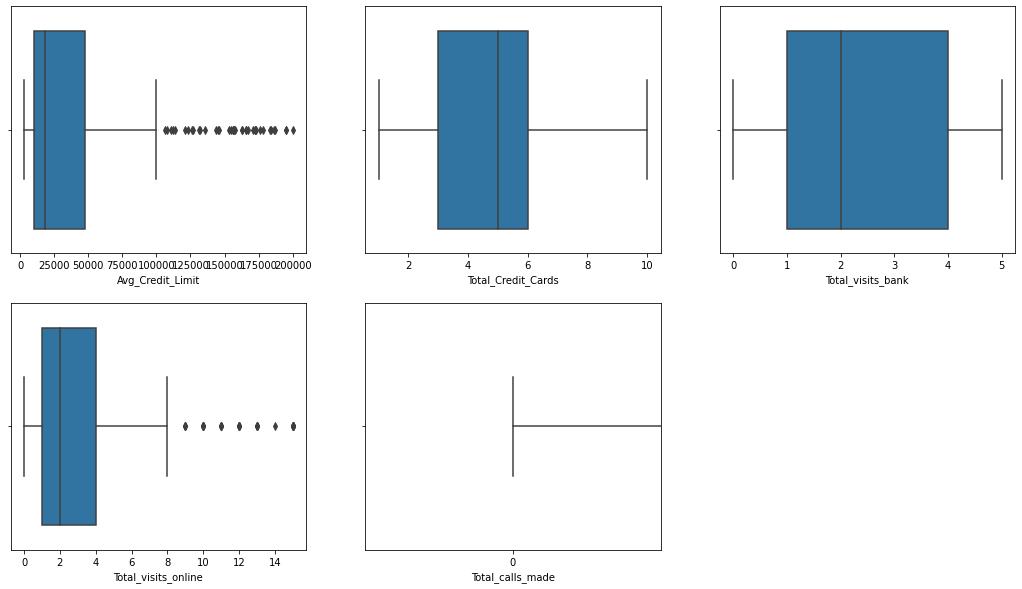

In [192]:
import seaborn as sns
fig, axes = plt.subplots(2,3, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=c2, x='Avg_Credit_Limit')
sns.boxplot(ax=axes[0, 1], data=c2, x='Total_Credit_Cards')
sns.boxplot(ax=axes[0, 2], data=c2, x='Total_visits_bank')
sns.boxplot(ax=axes[1, 0], data=c2, x='Total_visits_online')
sns.boxplot(ax=axes[1, 1], data=c2, x='Total_calls_made')
sns.boxplot(ax=axes[1,2].remove())

<AxesSubplot:>

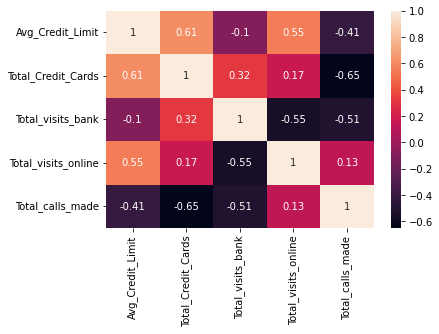

In [193]:
import seaborn as sb
c3=sb.heatmap(c2.corr(),annot=True)
c3

In [194]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
c3= scaler.fit_transform(c2.to_numpy())
c4= pd.DataFrame(c3, columns=['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank','Total_visits_online','Total_calls_made'])
c4

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


In [195]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp 
wcss_list= []  #Initializing the list for the values of WCSS  
  #Using for loop for iterations from 1 to 10.  
for i in range(1, 13):  
    kmeans = KMeans(n_clusters=i, init='k-means++')  
    kmeans.fit(c4)  
    wcss_list.append(kmeans.inertia_)  
wcss_list

[3300.0,
 2040.989816478495,
 933.0437490000535,
 780.7736895551768,
 704.4759188657505,
 642.2732175647976,
 603.5756377382684,
 563.4897374486142,
 537.2228745176085,
 512.9327309408468,
 484.9966779933135,
 465.06996451098166]

In [179]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil_score= [] 
for i in range(2, 13):  
    kmeans = KMeans(n_clusters=i, init='k-means++')  
    kmeans.fit(c2)  
    sil_score.append(silhouette_score(c4,kmeans.labels_))  
sil_score

[0.5656865539119661,
 0.19088054566196233,
 0.08711224105028602,
 0.07312449397102615,
 -0.03788397143796291,
 -0.06356129732922762,
 -0.07821273049805956,
 -0.07944924514606966,
 -0.09224533585643199,
 -0.09578755225716887,
 -0.11048086394416748]

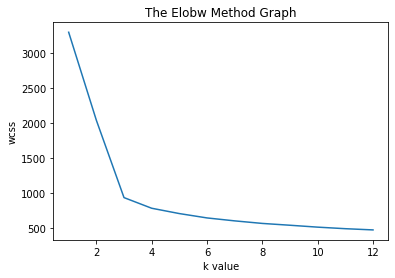

In [181]:
mtp.plot(range(1, 13), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('k value')  
mtp.ylabel('wcss')  
mtp.show()

In [200]:
kmeans1 = KMeans(n_clusters=3)
kmeans1.fit(c4)
labels=kmeans1.predict(c4)
labels

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [201]:
df = pd.DataFrame(labels, columns = ['label'])
df

,label
0,0
1,1
2,0
3,0
4,2
...,...
655,2
656,2
657,2
658,2


In [202]:
df1 = pd.concat([c4, df],axis = 1)
df1

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


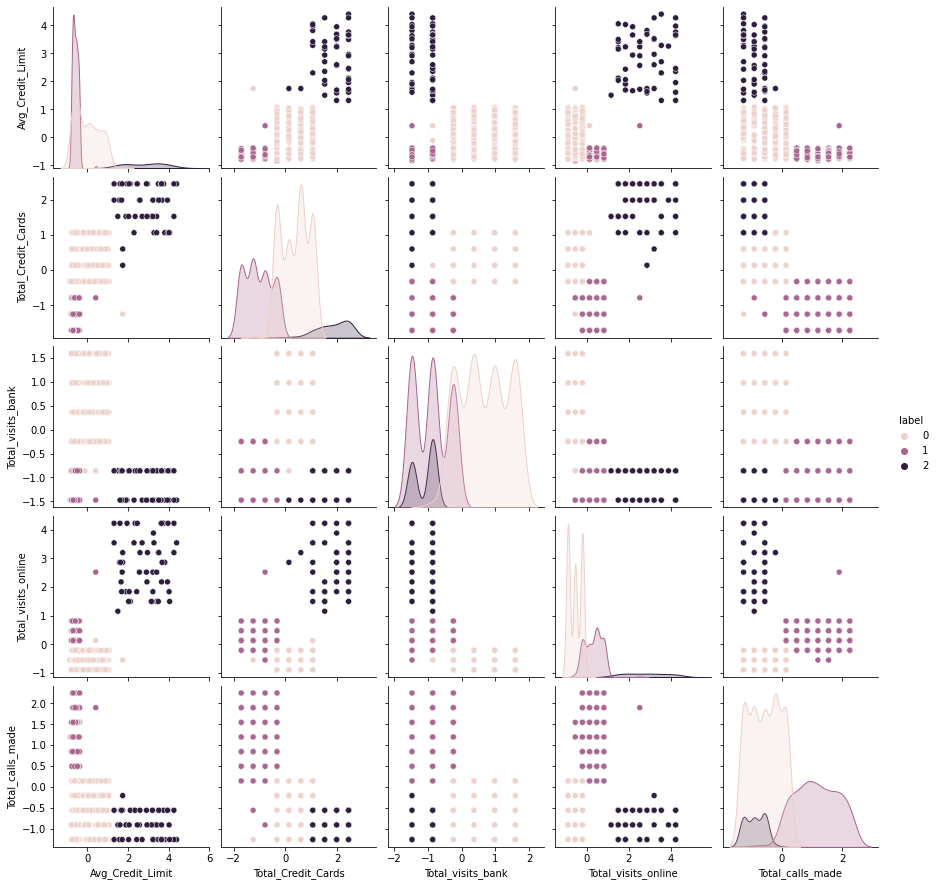

In [203]:
sns.pairplot(df1,hue ='label')

In [196]:
Coordinates =kmeans1.cluster_centers_
Coordinates

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488]])

In [159]:
score = silhouette_score(c4, labels,metric ='euclidean' )
print('Final Score: = ',score)

Final Score: =  0.5157182558881063
